In [41]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2024-06-05 08:06:22--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.3’

spam.csv.3          100%[===================>] 491.86K  --.-KB/s    in 0.06s   

2024-06-05 08:06:22 (8.17 MB/s) - ‘spam.csv.3’ saved [503663/503663]



In [43]:
# file contains some invalid chars
# depending on which version of pandas you have
# an error may be thrown
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [20]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


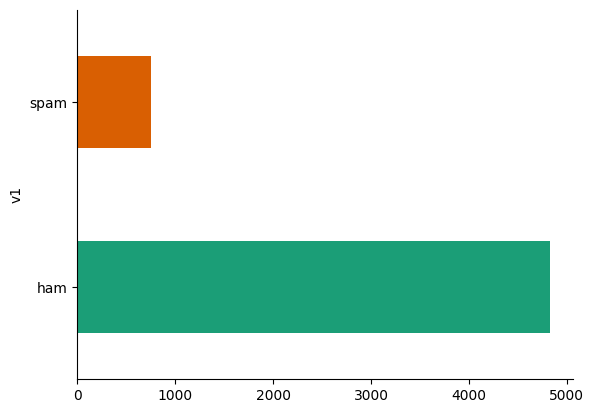

In [44]:
# @title v1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The classes are imbalanced, we do not have the same number of spam and ham rows.

In [45]:
inputs = df['v2']
labels = df['v1']
print(inputs)
print(labels)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object
0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object


In [46]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
    inputs, labels, random_state=123)

In [47]:
# Vectorize the training data
vectorizer = CountVectorizer()
Y_train_counts = vectorizer.fit_transform(inputs_train)
Y_train_counts.shape


(4179, 7411)

In [48]:
# Transform the counts to TF-IDF
tfidf_transformer = TfidfTransformer()
Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)
Y_train_tfidf.shape

(4179, 7411)

In [49]:
# Train the MultinomialNB classifier
clf = MultinomialNB().fit(Y_train_tfidf, Ytrain)

# Transform the test data using the same vectorizer and tfidf transformer
X_test_counts = vectorizer.transform(inputs_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predict the categories for the test data
predicted = clf.predict(X_test_tfidf)

# Print the predictions
for doc, category in zip(inputs_test, predicted):
    print('%r => %s' % (doc, category))

'Good. No swimsuit allowed :)' => ham
'Urgent! call 09066350750 from your landline. Your complimentary 4* Ibiza Holiday or 10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150 ppm 18+ ' => spam
'Im sorry bout last nite it wasnåÕt ur fault it was me, spouse it was pmt or sumthin! U 4give me? I think u shldxxxx' => ham
"+123 Congratulations - in this week's competition draw u have won the å£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm" => spam
'Wish i were with you now!' => ham
"She went to attend another two rounds today..but still did't reach home.." => ham
'Yar lor... Keep raining non stop... Or u wan 2 go elsewhere?' => ham
'Jus finish blowing my hair. U finish dinner already?' => ham
"K I'm ready,  &lt;#&gt; ?" => ham
'Match started.india  &lt;#&gt;  for 2' => ham
'Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX' => spam


In [52]:
# Calculate the F1 score
f1 = f1_score(Ytest, predicted, average='weighted')

# Calculate additional metrics
precision = precision_score(Ytest, predicted, average='weighted')
recall = recall_score(Ytest, predicted, average='weighted')
accuracy = accuracy_score(Ytest, predicted)

# Print the metrics
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)


F1 Score: 0.9588676334373786
Precision: 0.9635341975986375
Recall: 0.9619526202440776
Accuracy: 0.9619526202440776
